In [41]:
from tracktour import load_tiff_frames
import networkx as nx

im = load_tiff_frames('/home/ddon0001/PhD/data/cell_tracking_challenge/SUBMISSION/Fluo-N2DL-HeLa/01')
seg = load_tiff_frames('/home/ddon0001/PhD/data/cell_tracking_challenge/SUBMISSION/Fluo-N2DL-HeLa/01_ERR_SEG')
sol = nx.read_graphml('/home/ddon0001/PhD/experiments/scaled/no_div_constraint_err_seg/Fluo-N2DL-HeLa_01/matched_solution.graphml', node_type=int)

Loading TIFFs: 100%|██████████| 91/91 [00:00<00:00, 310.03it/s]


In [7]:
sol.nodes[403]

{'t': 8,
 'y': 504.6015325670498,
 'x': 900.0191570881226,
 'label': 38,
 'enter_exit_cost': 126.03201149425286,
 'div_cost': 47.98215854263214,
 'NodeFlag.TRUE_POS': True,
 'NodeFlag.NON_SPLIT': False,
 'NodeFlag.FALSE_POS': False}

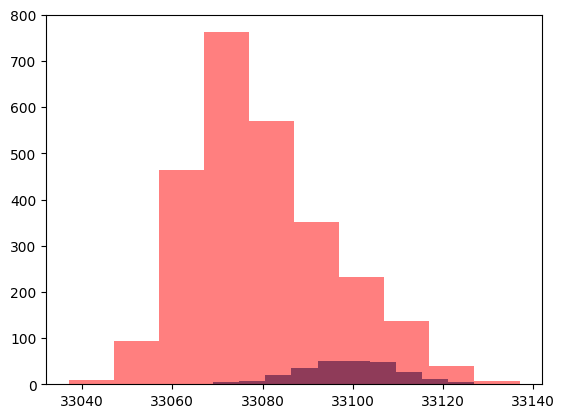

In [22]:
import matplotlib.pyplot as plt

# mask of furthest parent
label_mask = seg[8] == 38
plt.hist(im[9][label_mask].ravel())
# rough bounding box of cell
plt.hist(im[9, 482:528, 859:917].ravel(), color='r', alpha=0.5)
plt.show()

/home/ddon0001/miniconda3/envs/trexp/lib/python3.10/site-packages/skimage/filters/rank/generic.py:268: UserWarning: Bad rank filter performance is expected due to a large number of bins (33138), equivalent to an approximate bitdepth of 15.0.
  image, footprint, out, mask, n_bins = _preprocess_input(image, footprint,


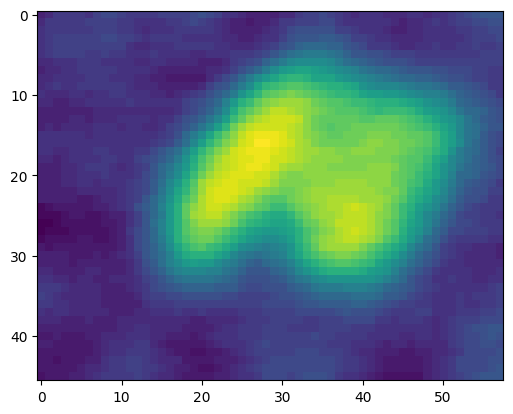

In [42]:
# watershed doesn't need binarized image
import numpy as np
from skimage.filters.rank import mean
from skimage.morphology import disk


filter_disk = disk(5)
region_of_interest = im[9, 482:528, 859:917]
filtered = mean(region_of_interest, filter_disk)

plt.imshow(filtered)

mask = np.zeros_like(im[9], dtype=bool)
mask[482:528, 859:917] = True
filtered_frame = im[9]
filtered_frame[mask] = filtered.ravel()
markers = np.zeros_like(filtered_frame)
markers[500, 885] = 2
markers[503, 898] = 1

from skimage.segmentation import watershed, chan_vese

# other_labels = chan_vese(filtered)
# plt.imshow(other_labels)
# labels = watershed(-filtered_frame, markers=markers, mask=mask)


# plt.imshow(labels[482:528, 859:917])
# Pierre was also right that we need to consider
# when the centerpoint is in "the middle" and we therefore
# need two seeds... maybe we take the midpoint of both parents
# to closest children post-split?
# how will that work with phase contrast/bright-field images

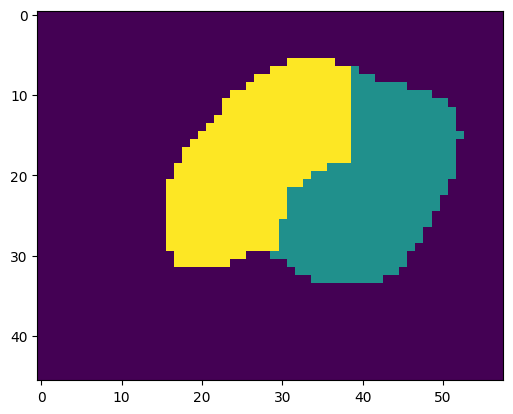

In [49]:
other_labels = chan_vese(filtered)
mask[482:528, 859:917] = other_labels
labels = watershed(-filtered_frame, markers=markers, mask=mask)
plt.imshow(labels[482:528, 859:917])

/home/ddon0001/miniconda3/envs/trexp/lib/python3.10/site-packages/cellpose/resnet_torch.py:275: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(filenam

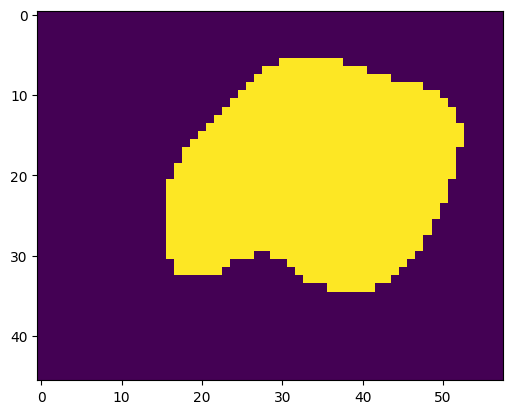

In [44]:
from cellpose import models
model = models.Cellpose(gpu=False, model_type="cyto3")


masks_pred, flows, styles, diams = model.eval([filtered], diameter=0, channels=[0,0])
plt.imshow(masks_pred[0])

In [50]:
# um ok but wb BF and PhC images

from tracktour import load_tiff_frames
import networkx as nx

im = load_tiff_frames('/home/ddon0001/PhD/data/cell_tracking_challenge/SUBMISSION/BF-C2DL-MuSC/01')
seg = load_tiff_frames('/home/ddon0001/PhD/data/cell_tracking_challenge/SUBMISSION/BF-C2DL-MuSC/01_ERR_SEG')
sol = nx.read_graphml('/home/ddon0001/PhD/experiments/scaled/no_div_constraint_err_seg/BF-C2DL-MuSC_01/matched_solution.graphml', node_type=int)

Loading TIFFs: 100%|██████████| 1375/1375 [00:06<00:00, 216.65it/s]


In [51]:
sol.nodes[3648]

{'t': 1289,
 'y': 171.2735849056604,
 'x': 874.1933962264151,
 'label': 4,
 'enter_exit_cost': 110.47146226415096,
 'div_cost': 78.11681803792779,
 'NodeFlag.TRUE_POS': True,
 'NodeFlag.NON_SPLIT': False,
 'NodeFlag.FALSE_POS': False}

In [61]:
from skimage.filters.rank import mean
from skimage.morphology import disk

bbox = np.s_[153:208, 849:907]
parent_frame = im[1289]
child_frame = im[1290]

# mean filter
filter_disk = disk(5)
region_of_interest = child_frame[bbox]
filtered = mean(region_of_interest, filter_disk)

masks_pred, flows, styles, diams = model.eval([filtered], diameter=0, channels=[0,0])
# cellpose segment

# watershed split?

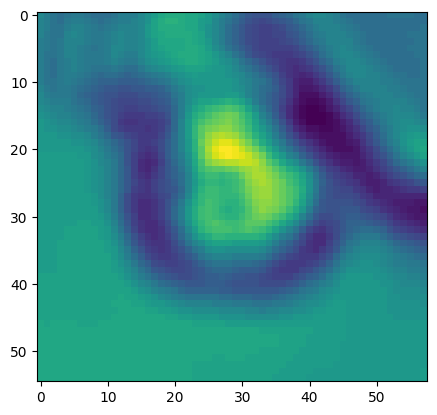

In [62]:
plt.imshow(filtered)

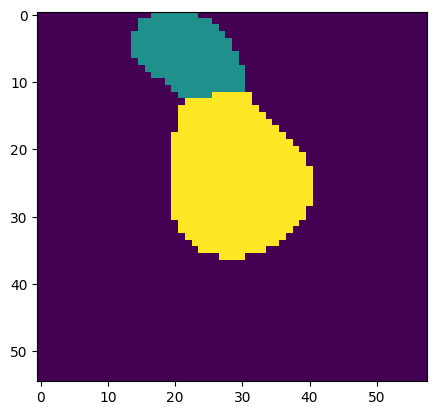

In [63]:
plt.imshow(masks_pred[0])

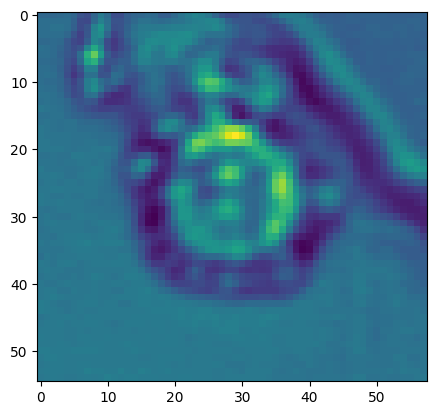

In [53]:
plt.imshow(region_of_interest)

In [55]:
from cellpose import models
model = models.Cellpose(gpu=False, model_type="cyto3")

/home/ddon0001/miniconda3/envs/trexp/lib/python3.10/site-packages/cellpose/resnet_torch.py:275: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(filenam

In [51]:
import networkx as nx
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist
from tracktour import load_tiff_frames

merge_fate_df = pd.read_csv('/home/ddon0001/PhD/experiments/merge_resolution/merge_fates.csv')
length_df = pd.read_csv('/home/ddon0001/PhD/experiments/merge_resolution/merge_lengths.csv')

def get_coords(node_info):
    return np.asarray([node_info[c] for c in (['z', 'y', 'x'] if 'z' in node_info else ['y', 'x'])])

ds_names = []
merge_ids = []
projected_child_one = []
projected_child_two = []
using_parents = []
for ds_name in merge_fate_df.ds_name.unique():
    ds, seq = ds_name.split('_')
    solution = nx.read_graphml(f'/home/ddon0001/PhD/experiments/scaled/no_div_constraint_err_seg/{ds_name}/matched_solution.graphml', node_type=int)
    seg = load_tiff_frames(f'/home/ddon0001/PhD/data/cell_tracking_challenge/SUBMISSION/{ds}/{seq}_ERR_SEG')

    merge_nodes = length_df[length_df.ds_name == ds_name]
    for length_row in merge_nodes.itertuples():
        merge_id = length_row.merge_id
        merge_length = length_row.length

        parent_ids = list(solution.predecessors(merge_id))
        parent_one_info = solution.nodes[parent_ids[0]]
        parent_two_info = solution.nodes[parent_ids[1]]
        using_parent = False

        # need to find the children of the split
        # we want to do this because if the cell needs to be split
        # the merge node centroid will likely be smack bang in the middle
        # so it won't lead to a good split with watershed
        if merge_length <= 2:
            # follow the merge to the end
            parent = merge_id
            children = list(solution.successors(parent))
            while len(children) == 1:
                parent = children[0]
                children = list(solution.successors(parent))
            # merge just terminates so we use the two parents
            if len(children) == 0:
                split_child_one_info = parent_one_info
                split_child_two_info = parent_two_info
                using_parent = True
            else:
                split_child_one_info = solution.nodes[children[0]]
                split_child_two_info = solution.nodes[children[1]]
        # very long merge, we just use two parents
        else:
            split_child_one_info = parent_one_info
            split_child_two_info = parent_two_info
            using_parent = True
        
        # project the proposed two cell centroids
        parent_one_coords = get_coords(parent_one_info)
        parent_two_coords = get_coords(parent_two_info)
        split_child_one_coords = get_coords(split_child_one_info)
        split_child_two_coords = get_coords(split_child_two_info)
        parent_coords = [parent_one_coords, parent_two_coords]
        child_coords = [split_child_one_coords, split_child_two_coords]
        dist_matrix = cdist(parent_coords, child_coords, 'sqeuclidean')
        parent_one_child_one_diag = dist_matrix[0, 0] + dist_matrix[1, 1]
        parent_one_child_two_diag = dist_matrix[0, 1] + dist_matrix[1, 0]
        if parent_one_child_one_diag < parent_one_child_two_diag:
            parent_one_pair = 0
            parent_two_pair = 1
        else:
            parent_one_pair = 1
            parent_two_pair = 0
        
        # using the children, we predict the centers of the two cells in the next frame
        if using_parent:
            projected_child_one_coords = parent_one_coords
            projected_child_two_coords = parent_two_coords
        else:
            # average displacement over the travelled frames
            pair_one_displacement = (child_coords[parent_one_pair] - parent_one_coords) / (split_child_one_info['t'] - parent_one_info['t'])
            pair_two_displacement = (child_coords[parent_two_pair] - parent_two_coords) / (split_child_two_info['t'] - parent_two_info['t'])
            
            projected_child_one_coords = parent_one_coords + pair_one_displacement
            projected_child_two_coords = parent_two_coords + pair_two_displacement
        ds_names.append(ds_name)
        merge_ids.append(merge_id)
        projected_child_one.append(projected_child_one_coords)
        projected_child_two.append(projected_child_two_coords)
        using_parents.append(using_parent)

projected_children_df = pd.DataFrame({
    'ds_name': ds_names,
    'merge_id': merge_ids,
    'projected_child_one_coords': projected_child_one,
    'projected_child_two_coords': projected_child_two,
    'using_parents': using_parents
})
        

Loading TIFFs: 100%|██████████| 189/189 [00:08<00:00, 21.99it/s]


In [54]:
projected_children_df.to_csv('/home/ddon0001/PhD/experiments/merge_resolution/projected_children_all.csv', index=False)

In [55]:
import networkx as nx
import pandas as pd

projected_children_df = pd.read_csv('/home/ddon0001/PhD/experiments/merge_resolution/projected_children_all.csv')

# what do we know about the projected coords now
projected_children_df['child_one_overlap_merge'] = False
projected_children_df['child_two_overlap_merge'] = False
projected_children_df['child_one_overlap_other'] = False
projected_children_df['child_two_overlap_other'] = False
for ds_name in projected_children_df.ds_name.unique():
    ds, seq = ds_name.split('_')
    ds_children = projected_children_df[projected_children_df.ds_name == ds_name]
    seg = load_tiff_frames(f'/home/ddon0001/PhD/data/cell_tracking_challenge/SUBMISSION/{ds}/{seq}_ERR_SEG')
    sol = nx.read_graphml(f'/home/ddon0001/PhD/experiments/scaled/no_div_constraint_err_seg/{ds_name}/matched_solution.graphml', node_type=int)
    for row in ds_children.itertuples():
        merge_id = row.merge_id
        first_cell_list = row.projected_child_one_coords.lstrip('[').lstrip(' ').rstrip(']').split(' ')
        first_cell = []
        for coord_str in first_cell_list:
            if len(coord_str.strip(' ')):
                first_cell.append(float(coord_str))
        first_cell_int = tuple([int(x) for x in first_cell])

        second_cell_list = row.projected_child_two_coords.lstrip('[').lstrip(' ').rstrip(']').split(' ')
        second_cell = []
        for coord_str in second_cell_list:
            if len(coord_str.strip(' ')):
                second_cell.append(float(coord_str))
        second_cell_int = tuple([int(x) for x in second_cell])

        merge_info = sol.nodes[merge_id]
        merge_label = merge_info['label']
        frame_of_interest = seg[merge_info['t']]
        if frame_of_interest[first_cell_int] == merge_label:
            projected_children_df.at[row.Index, 'child_one_overlap_merge'] = True
        elif frame_of_interest[first_cell_int] != 0:
            projected_children_df.at[row.Index, 'child_one_overlap_other'] = True
        if frame_of_interest[second_cell_int] == merge_label:
            projected_children_df.at[row.Index, 'child_two_overlap_merge'] = True
        elif frame_of_interest[second_cell_int] != 0:
            projected_children_df.at[row.Index, 'child_two_overlap_other'] = True
projected_children_df.to_csv('/home/ddon0001/PhD/experiments/merge_resolution/projected_children_all.csv', index=False)
        
        

Loading TIFFs: 100%|██████████| 189/189 [00:08<00:00, 22.39it/s]


In [64]:
merge_fate_df = pd.read_csv('/home/ddon0001/PhD/experiments/merge_resolution/merge_fates.csv')
length_df = pd.read_csv('/home/ddon0001/PhD/experiments/merge_resolution/merge_lengths.csv')
projected_children_df['correct_fate'] = 'None'
projected_children_df['length'] = -1
for row in projected_children_df.itertuples():
    merge_fate_info = merge_fate_df[(merge_fate_df.ds_name == row.ds_name) & (merge_fate_df.v == row.merge_id)]
    length_info = length_df[(length_df.ds_name == row.ds_name) & (length_df.merge_id == row.merge_id)]
    projected_children_df.at[row.Index, 'length'] = length_info.length.values[0]
    projected_children_df.at[row.Index, 'correct_fate'] = merge_fate_info.correct_fate.values[0]
projected_children_df.to_csv('/home/ddon0001/PhD/experiments/merge_resolution/projected_children_all.csv', index=False)

In [1]:
import pandas as pd
projected_children_df = pd.read_csv('/home/ddon0001/PhD/experiments/merge_resolution/projected_children_all.csv')

In [2]:
no_overlaps = projected_children_df[(projected_children_df.child_one_overlap_merge == False) & (projected_children_df.child_two_overlap_merge == False)]
no_overlaps.correct_fate.value_counts()

correct_fate
introduce    18
skip          4
terminate     4
migrate       1
Name: count, dtype: int64

In [58]:
len(projected_children_df)

572

In [3]:
both_overlap = projected_children_df[(projected_children_df.child_one_overlap_merge == True) & (projected_children_df.child_two_overlap_merge == True)]
both_overlap.correct_fate.value_counts()

correct_fate
terminate    41
introduce    30
skip         21
migrate       7
Name: count, dtype: int64

In [4]:
both_overlap_intro = both_overlap[both_overlap.correct_fate == 'introduce']
both_overlap_term = both_overlap[both_overlap.correct_fate == 'terminate']

both_overlap_intro.head()

,ds_name,merge_id,projected_child_one_coords,projected_child_two_coords,using_parents,child_one_overlap_merge,child_two_overlap_merge,child_one_overlap_other,child_two_overlap_other,correct_fate,length
18,Fluo-N2DL-HeLa_01,453,[503.76856931 900.27283612],[500.84669936 884.73128236],False,True,True,False,False,introduce,0
74,BF-C2DL-MuSC_01,4009,[165.70625373 863.68928282],[170.98935131 845.4161866 ],False,True,True,False,False,introduce,2
75,BF-C2DL-MuSC_01,4044,[180.8868638 884.97033051],[178.83978746 867.26511812],False,True,True,False,False,introduce,0
90,BF-C2DL-MuSC_01,4832,[210.07387748 910.0513532 ],[205.90845372 891.82077047],False,True,True,False,False,introduce,0
168,PhC-C2DL-PSC_01,17386,[227.12222766 554.53538813],[237.99254298 555.08820177],False,True,True,False,False,introduce,0


In [5]:
both_overlap.ds_name.unique()

array(['Fluo-C3DL-MDA231_02', 'Fluo-N2DL-HeLa_01', 'Fluo-N2DL-HeLa_02',
       'BF-C2DL-MuSC_01', 'PhC-C2DL-PSC_01', 'PhC-C2DL-PSC_02',
       'Fluo-N3DH-CE_01', 'Fluo-N3DH-CE_02'], dtype=object)

In [5]:
def str_to_int_coords_tuple(coord_str):
    coord_list = coord_str.lstrip('[').lstrip(' ').rstrip(']').split(' ')
    coords = []
    for coord_str in coord_list:
        if len(coord_str.strip(' ')):
            coords.append(float(coord_str))
    return tuple([int(x) for x in coords])

In [85]:
from tracktour import load_tiff_frames
import networkx as nx
from scipy.ndimage import distance_transform_edt
from skimage.segmentation import watershed

im = load_tiff_frames('/home/ddon0001/PhD/data/cell_tracking_challenge/SUBMISSION/Fluo-N2DL-HeLa/01')
seg = load_tiff_frames('/home/ddon0001/PhD/data/cell_tracking_challenge/SUBMISSION/Fluo-N2DL-HeLa/01_ERR_SEG')
sol = nx.read_graphml('/home/ddon0001/PhD/experiments/scaled/no_div_constraint_err_seg/Fluo-N2DL-HeLa_01/matched_solution.graphml', node_type=int)

node_info = sol.nodes[453]
frame_of_interest = seg[node_info['t']]
mask_label = node_info['label']
mask = frame_of_interest == mask_label
markers = np.zeros_like(mask, dtype=int)
cell_one_coords = str_to_int_coords_tuple(both_overlap_intro.projected_child_one_coords.values[0])
cell_two_coords = str_to_int_coords_tuple(both_overlap_intro.projected_child_two_coords.values[0])
markers[cell_one_coords] = 1
markers[cell_two_coords] = 2
marker_mask = markers != 0
marker_distance = distance_transform_edt(marker_mask)
out = watershed(-marker_distance, markers=markers, mask=mask)

Loading TIFFs: 100%|██████████| 91/91 [00:00<00:00, 273.30it/s]


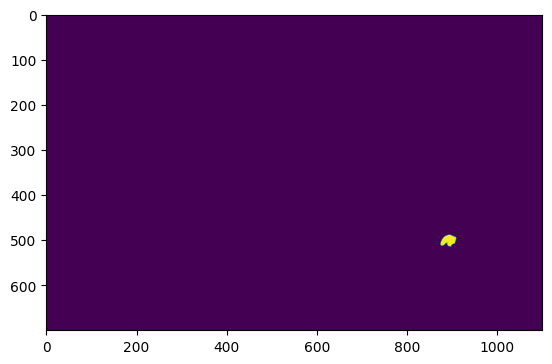

In [78]:
import matplotlib.pyplot as plt

plt.imshow(mask)

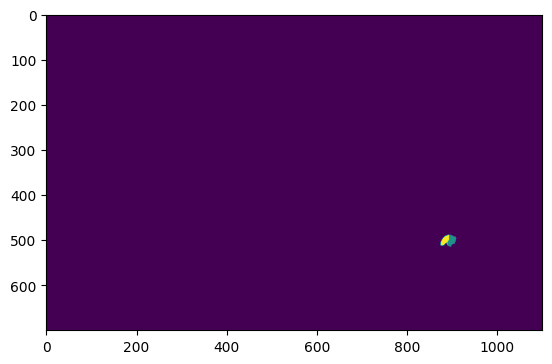

In [87]:
plt.imshow(out)

In [88]:
both_overlap_term.head()

,ds_name,merge_id,projected_child_one_coords,projected_child_two_coords,using_parents,child_one_overlap_merge,child_two_overlap_merge,child_one_overlap_other,child_two_overlap_other,correct_fate,length
1,Fluo-C3DL-MDA231_02,243,[ 20.52318841 269.26666667 57.76666667],[ 22.0715847 284.80382514 62.95519126],True,True,True,False,False,terminate,7
28,Fluo-N2DL-HeLa_01,4781,[410.77993365 378.44052868],[425.42959299 383.75056529],False,True,True,False,False,terminate,2
55,Fluo-N2DL-HeLa_02,22526,[ 107.40032154 1022.73151125],[ 118.46938776 1035.09070295],True,True,True,False,False,terminate,7
64,Fluo-N2DL-HeLa_02,25176,[302.77941176 363.49019608],[311.52669039 371.62989324],True,True,True,False,False,terminate,0
267,PhC-C2DL-PSC_01,47840,[50.47663551 97.42056075],[ 49.18367347 107.57142857],True,True,True,False,False,terminate,5


In [113]:
from tracktour import load_tiff_frames
import networkx as nx
from scipy.ndimage import distance_transform_edt
from skimage.segmentation import watershed

im = load_tiff_frames('/home/ddon0001/PhD/data/cell_tracking_challenge/SUBMISSION/PhC-C2DL-PSC/01')
seg = load_tiff_frames('/home/ddon0001/PhD/data/cell_tracking_challenge/SUBMISSION/PhC-C2DL-PSC/01_ERR_SEG')
sol = nx.read_graphml('/home/ddon0001/PhD/experiments/scaled/no_div_constraint_err_seg/PhC-C2DL-PSC_01/matched_solution.graphml', node_type=int)

node_info = sol.nodes[47840]
frame_of_interest = seg[node_info['t']]
mask_label = node_info['label']
mask = frame_of_interest == mask_label
markers = np.zeros_like(mask, dtype=int)
cell_one_coords = str_to_int_coords_tuple(both_overlap_term.projected_child_one_coords.values[4])
cell_two_coords = str_to_int_coords_tuple(both_overlap_term.projected_child_two_coords.values[4])
markers[cell_one_coords] = 1
markers[cell_two_coords] = 2
marker_mask = markers != 0
marker_distance = distance_transform_edt(marker_mask)
out = watershed(-marker_distance, markers=markers, mask=mask)

Loading TIFFs: 100%|██████████| 299/299 [00:00<00:00, 433.23it/s]


In [114]:
node_info['t']

257

In [115]:
node_info['label']

35

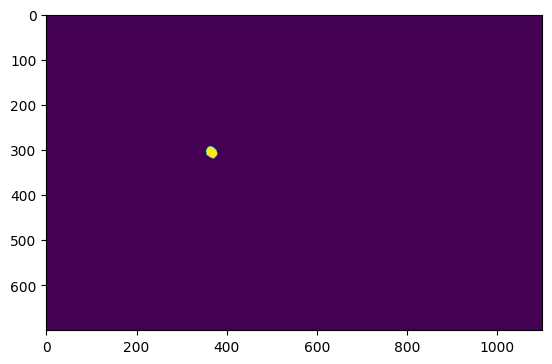

In [104]:
plt.imshow(mask)

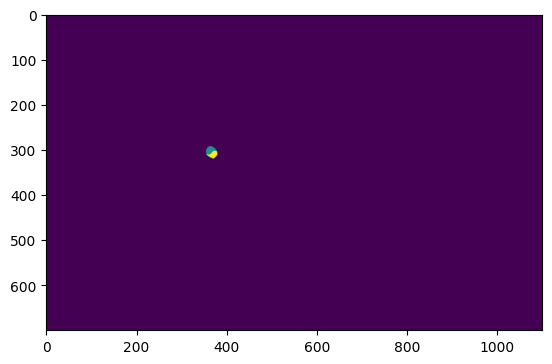

In [105]:
plt.imshow(out)

In [6]:
single_overlap = projected_children_df[(projected_children_df.child_one_overlap_merge != projected_children_df.child_two_overlap_merge)]
other_overlap = single_overlap[(single_overlap.child_one_overlap_other == True) | (single_overlap.child_two_overlap_other == True)]
actual_single_overlap = single_overlap[(single_overlap.child_one_overlap_other == False) & (single_overlap.child_two_overlap_other == False)]

actual_single_overlap.correct_fate.value_counts()

correct_fate
introduce    325
terminate     79
skip          19
migrate        8
Name: count, dtype: int64

In [8]:
actual_single_overlap.head()

,ds_name,merge_id,projected_child_one_coords,projected_child_two_coords,using_parents,child_one_overlap_merge,child_two_overlap_merge,child_one_overlap_other,child_two_overlap_other,correct_fate,length
0,Fluo-C3DL-MDA231_01,332,[ 8.00740056 399.65494912 133.87742831],[ 8.18459003 426.72064277 119.78862794],True,False,True,False,False,introduce,0
2,Fluo-C3DL-MDA231_02,432,[ 15.90120968 221.62567204 145.11290323],[ 19.54742663 234.93449596 160.72649936],True,False,True,False,False,terminate,3
3,Fluo-C3DL-MDA231_02,545,[ 7.8056266 184.25 36.19373402],[ 8.04268293 182.84908537 20.18902439],True,True,False,False,False,terminate,0
4,Fluo-C3DL-MDA231_02,577,[ 20.62215909 287.48579545 412.02769886],[ 22.70584577 336.09390547 423.11069652],True,False,True,False,False,terminate,0
5,Fluo-N2DH-GOWT1_01,1776,[380.85879218 144.1625222 ],[428.71428571 240.63307494],True,False,True,False,False,skip,6


In [7]:
def get_coords(node_info):
    return np.asarray([node_info[c] for c in (['z', 'y', 'x'] if 'z' in node_info else ['y', 'x'])])

/home/ddon0001/miniconda3/envs/trexp/lib/python3.10/site-packages/cellpose/resnet_torch.py:275: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(filenam

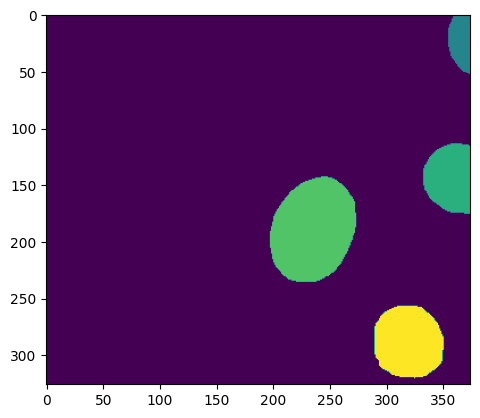

In [8]:
from skimage.measure import regionprops_table
from tracktour import load_tiff_frames
from cellpose import models
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

model = models.Cellpose(gpu=False, model_type="cyto3")


# masks_pred, flows, styles, diams = model.eval([filtered], diameter=0, channels=[0,0])
# plt.imshow(masks_pred[0])

im = load_tiff_frames('/home/ddon0001/PhD/data/cell_tracking_challenge/SUBMISSION/Fluo-N2DH-GOWT1/01')
seg = load_tiff_frames('/home/ddon0001/PhD/data/cell_tracking_challenge/SUBMISSION/Fluo-N2DH-GOWT1/01_ERR_SEG')
sol = nx.read_graphml('/home/ddon0001/PhD/experiments/scaled/no_div_constraint_err_seg/Fluo-N2DH-GOWT1_01/matched_solution.graphml', node_type=int)

row_of_interest = actual_single_overlap.iloc[4]

# get average edge length in solution
edge_source_coords = []
edge_dest_coords = []
for u, v in sol.edges:
    u_info = sol.nodes[u]
    v_info = sol.nodes[v]
    edge_source_coords.append(get_coords(u_info))
    edge_dest_coords.append(get_coords(v_info))
edge_source_coords = np.asarray(edge_source_coords)
edge_dest_coords = np.asarray(edge_dest_coords)
edge_displacements = edge_dest_coords - edge_source_coords
average_displacements = np.abs(np.mean(edge_displacements, axis=0))

# get average diameter of cell using `axis_major_length`
axis_major_lengths = []
for frame in seg:
    axis_major_lengths.extend(list(regionprops_table(frame, properties=['axis_major_length']).values())[0])
average_cell_length = np.mean(axis_major_lengths)

# need bounding box to lift frame from these coords
cell_one_coords = str_to_int_coords_tuple(row_of_interest.projected_child_one_coords)
cell_two_coords = str_to_int_coords_tuple(row_of_interest.projected_child_two_coords)

# we need the min and the max along each dimension
min_coords = []
max_coords = []
for ax in range(len(cell_one_coords)):
    ax_min = min(cell_one_coords[ax], cell_two_coords[ax])
    # the min values get (2*average_cell_length + 2*axis_displacement) subtracted
    ax_min = max(0, ax_min - (2*average_cell_length + 2*average_displacements[ax]))
    min_coords.append(int(ax_min))

    # the max values get (2*average_cell_length + 2*axis_displacement) added
    ax_max = max(cell_one_coords[ax], cell_two_coords[ax])
    ax_max = min(im[0].shape[ax], ax_max + (2*average_cell_length + 2*average_displacements[ax]))
    max_coords.append(int(ax_max))

bounding_slice = tuple(slice(m, M+1) for m, M in zip(min_coords, max_coords))


merge_info = sol.nodes[row_of_interest.merge_id]
t_of_interest = merge_info['t']
frame_of_interest = seg[t_of_interest]
bbox = frame_of_interest[bounding_slice]

plt.imshow(bbox)

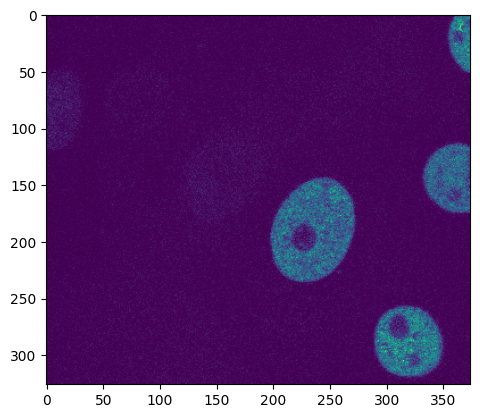

In [9]:
im_region = im[t_of_interest][bounding_slice]
plt.imshow(im_region)

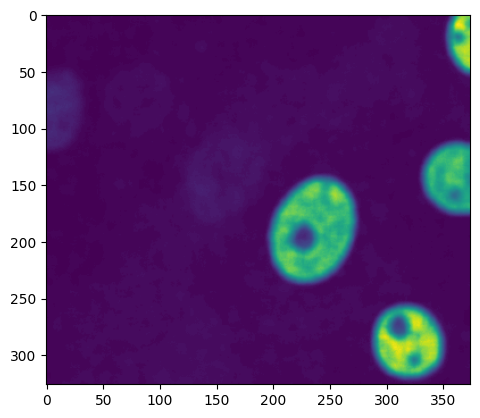

In [19]:
from skimage.filters.rank import mean
from skimage.morphology import disk


filter_disk = disk(5)
filtered = mean(im_region, filter_disk)
plt.imshow(filtered)

In [72]:
masks_pred, flows, styles, diams = model.eval([filtered], diameter=69, channels=[0,0])

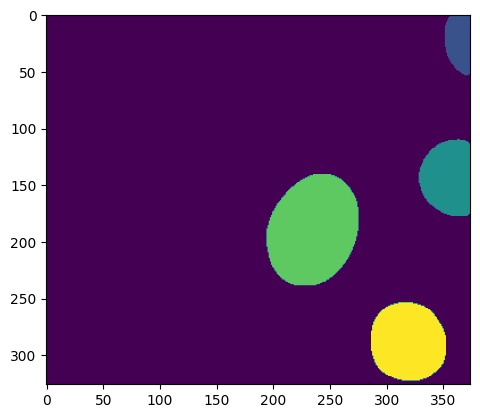

In [73]:
plt.imshow(masks_pred[0])

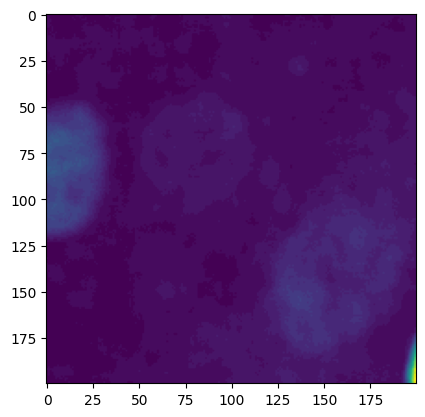

In [23]:
filtered_small = filtered[0:200, 0:200]
plt.imshow(filtered_small)

In [24]:
masks_pred, flows, styles, diams = model.eval([filtered_small], diameter=69, channels=[0,0])

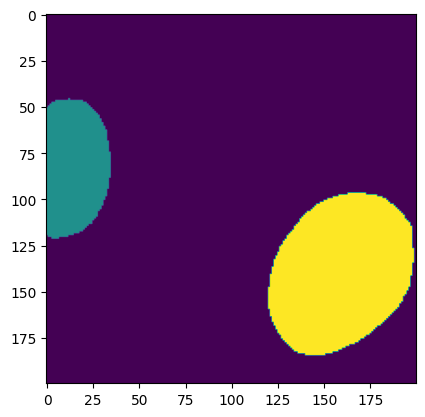

In [25]:
plt.imshow(masks_pred[0])

In [69]:
import pandas as pd

resolved_df = pd.read_csv('/home/ddon0001/PhD/experiments/merge_resolution/projected_children_resolved_full_reg_split_all.csv')
non_resolved = pd.read_csv('/home/ddon0001/PhD/experiments/merge_resolution/projected_children_all.csv')

splits = resolved_df[resolved_df.decision == 'split']


99

In [55]:
# let's check sum of parents area and sum of children area for splits w. correct fate introduce vs. other
from skimage.measure import regionprops

ds_names = splits.ds_name.unique()

split_ds_names = []
split_merge_ids = []
split_correct_fates = []
split_parent_area_1 = []
split_parent_area_2 = []
split_parent_area_sums = []
split_child_area_1 = []
split_child_area_2 = []
split_child_area_sums = []
for ds_name in ds_names:
    ds, seq = ds_name.split('_')
    new_seg = load_tiff_frames(f'/home/ddon0001/PhD/experiments/merge_resolution/{ds}/{seq}_ERR_SEG')
    detections = pd.read_csv(f'/home/ddon0001/PhD/data/cell_tracking_challenge/SUBMISSION/{ds}/{seq}_ERR_SEG/detections.csv')
    sol = nx.read_graphml(f'/home/ddon0001/PhD/experiments/scaled/no_div_constraint_err_seg/{ds_name}/matched_solution.graphml', node_type=int)

    for row in splits[splits.ds_name == ds_name].itertuples():
        merge_id = row.merge_id
        correct_fate = row.correct_fate

        split_ds_names.append(ds_name)
        split_merge_ids.append(merge_id)
        split_correct_fates.append(correct_fate)

        parents_of_merge = list(sol.predecessors(merge_id))
        parent_area_sum = 0
        for i, parent in enumerate(parents_of_merge):
            parent_info = sol.nodes[parent]
            parent_label = parent_info['label']
            parent_t = parent_info['t']
            parent_det = detections[(detections.label == parent_label) & (detections.t == parent_t)]
            assert parent_det.index[0] == parent
            parent_area = parent_det.area.values[0]
            if i == 0:
                split_parent_area_1.append(parent_area)
            else:
                split_parent_area_2.append(parent_area)
            parent_area_sum += parent_area
        split_parent_area_sums.append(parent_area_sum)
        
        merge_info = sol.nodes[merge_id]
        merge_t = merge_info['t']
        child_one_label = row.new_label_1
        child_two_label = row.new_label_2
        frame_of_interest = new_seg[merge_t]
        child_area_sum = 0
        for i, label in enumerate([child_one_label, child_two_label]):
            region = (frame_of_interest == label).astype(int)
            props = regionprops_table(region, properties=['area'])
            child_area = props['area'][0]
            if i == 0:
                split_child_area_1.append(child_area)
            else:
                split_child_area_2.append(child_area)
            child_area_sum += child_area
        split_child_area_sums.append(child_area_sum)


split_area_df = pd.DataFrame({
    'ds_name': split_ds_names,
    'merge_id': split_merge_ids,
    'correct_fate': split_correct_fates,
    'parent_area_1': split_parent_area_1,
    'parent_area_2': split_parent_area_2,
    'parent_area_sum': split_parent_area_sums,
    'child_area_1': split_child_area_1,
    'child_area_2': split_child_area_2,
    'child_area_sum': split_child_area_sums
})

Loading TIFFs: 100%|██████████| 189/189 [00:02<00:00, 73.02it/s]


In [70]:
split_area_df.correct_fate.value_counts()

correct_fate
terminate    41
introduce    30
skip         21
migrate       7
Name: count, dtype: int64

In [71]:
projected_children_df.correct_fate.value_counts()

correct_fate
introduce    377
terminate    126
skip          45
migrate       24
Name: count, dtype: int64

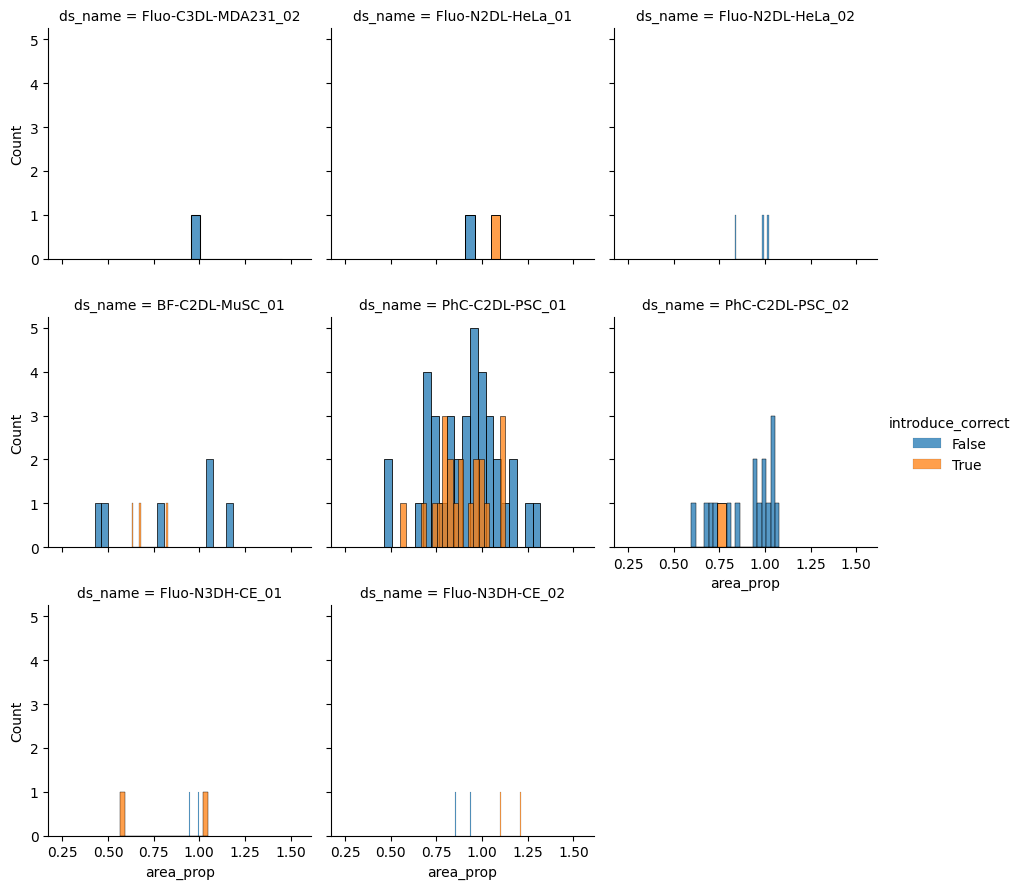

In [57]:
import seaborn as sns

split_area_df['introduce_correct'] = split_area_df.correct_fate == 'introduce'
split_area_df['area_prop'] = split_area_df.child_area_sum / split_area_df.parent_area_sum
grid = sns.FacetGrid(split_area_df, col='ds_name', col_wrap=3, hue='introduce_correct')
grid.map_dataframe(sns.histplot, x='area_prop', bins=20)
grid.add_legend()

In [59]:
introduce = resolved_df[resolved_df.decision == 'introduce']
introduce.correct_fate.value_counts()

correct_fate
introduce    134
terminate     42
skip           3
Name: count, dtype: int64

In [1]:
from collections import defaultdict
import pandas as pd
import os
import json

old_metrics_pth = '/home/ddon0001/PhD/experiments/scaled/no_div_constraint_err_seg/'
new_metrics_pth = '/home/ddon0001/PhD/experiments/merge_resolution/sols_no_split_gaussian/'

resolved_ds = os.listdir(new_metrics_pth)
metrics_compare = defaultdict(list)
for ds in resolved_ds:
    if os.path.isdir(os.path.join(new_metrics_pth, ds)):
        old_pth = os.path.join(old_metrics_pth, f'{ds}/metrics.json')
        new_pth = os.path.join(new_metrics_pth, f'{ds}/metrics.json')
        with open(old_pth, 'r') as f:
            old_metrics = json.load(f)
        with open(new_pth, 'r') as f:
            new_metrics = json.load(f)
        for key in old_metrics:
            metrics_compare[f'old_{key}'].append(old_metrics[key])
            metrics_compare[f'new_{key}'].append(new_metrics[key])
        metrics_compare['ds_name'].append(ds)
compare_df = pd.DataFrame(metrics_compare)
print(compare_df[['old_fn_nodes', 'new_fn_nodes', 'old_fp_nodes', 'new_fp_nodes']])
        


    old_fn_nodes  new_fn_nodes  old_fp_nodes  new_fp_nodes
0             29            24             0            21
1             72            70             0             3
2              1             0             0             0
3             17            13             0             5
4              2             1             0             2
5            230           230             0             0
6             42            41             0             2
7            101           101             0             2
8              3             3             0             1
9              0             0             0             0
10           336           288             0            73
11             0             0             0             0
12            23            23             0             0
13             4             4             0             0
14            13            13             0             0
15            37            37             0            

In [2]:
from collections import defaultdict
import pandas as pd
import os
import json

old_metrics_pth = '/home/ddon0001/PhD/experiments/scaled/no_div_constraint_err_seg/'
new_metrics_pth = '/home/ddon0001/PhD/experiments/merge_resolution/sols_no_split_small_reg_gaussian/'

resolved_ds = os.listdir(new_metrics_pth)
metrics_compare = defaultdict(list)
for ds in resolved_ds:
    if os.path.isdir(os.path.join(new_metrics_pth, ds)):
        old_pth = os.path.join(old_metrics_pth, f'{ds}/metrics.json')
        new_pth = os.path.join(new_metrics_pth, f'{ds}/metrics.json')
        with open(old_pth, 'r') as f:
            old_metrics = json.load(f)
        with open(new_pth, 'r') as f:
            new_metrics = json.load(f)
        for key in old_metrics:
            metrics_compare[f'old_{key}'].append(old_metrics[key])
            metrics_compare[f'new_{key}'].append(new_metrics[key])
        metrics_compare['ds_name'].append(ds)
compare_df = pd.DataFrame(metrics_compare)
print(compare_df[['old_fn_nodes', 'new_fn_nodes', 'old_fp_nodes', 'new_fp_nodes']])
        


    old_fn_nodes  new_fn_nodes  old_fp_nodes  new_fp_nodes
0             29            25             0            18
1             72            70             0             1
2              1             0             0             0
3             17            12             0             8
4              2             1             0             0
5            230           230             0             0
6             42            41             0             2
7            101           100             0             2
8              3             3             0             2
9              0             0             0             0
10           336           294             0            71
11             0             0             0             0
12            23            23             0             1
13             4             4             0             0
14            13            13             0             0
15            37            37             0            